In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline

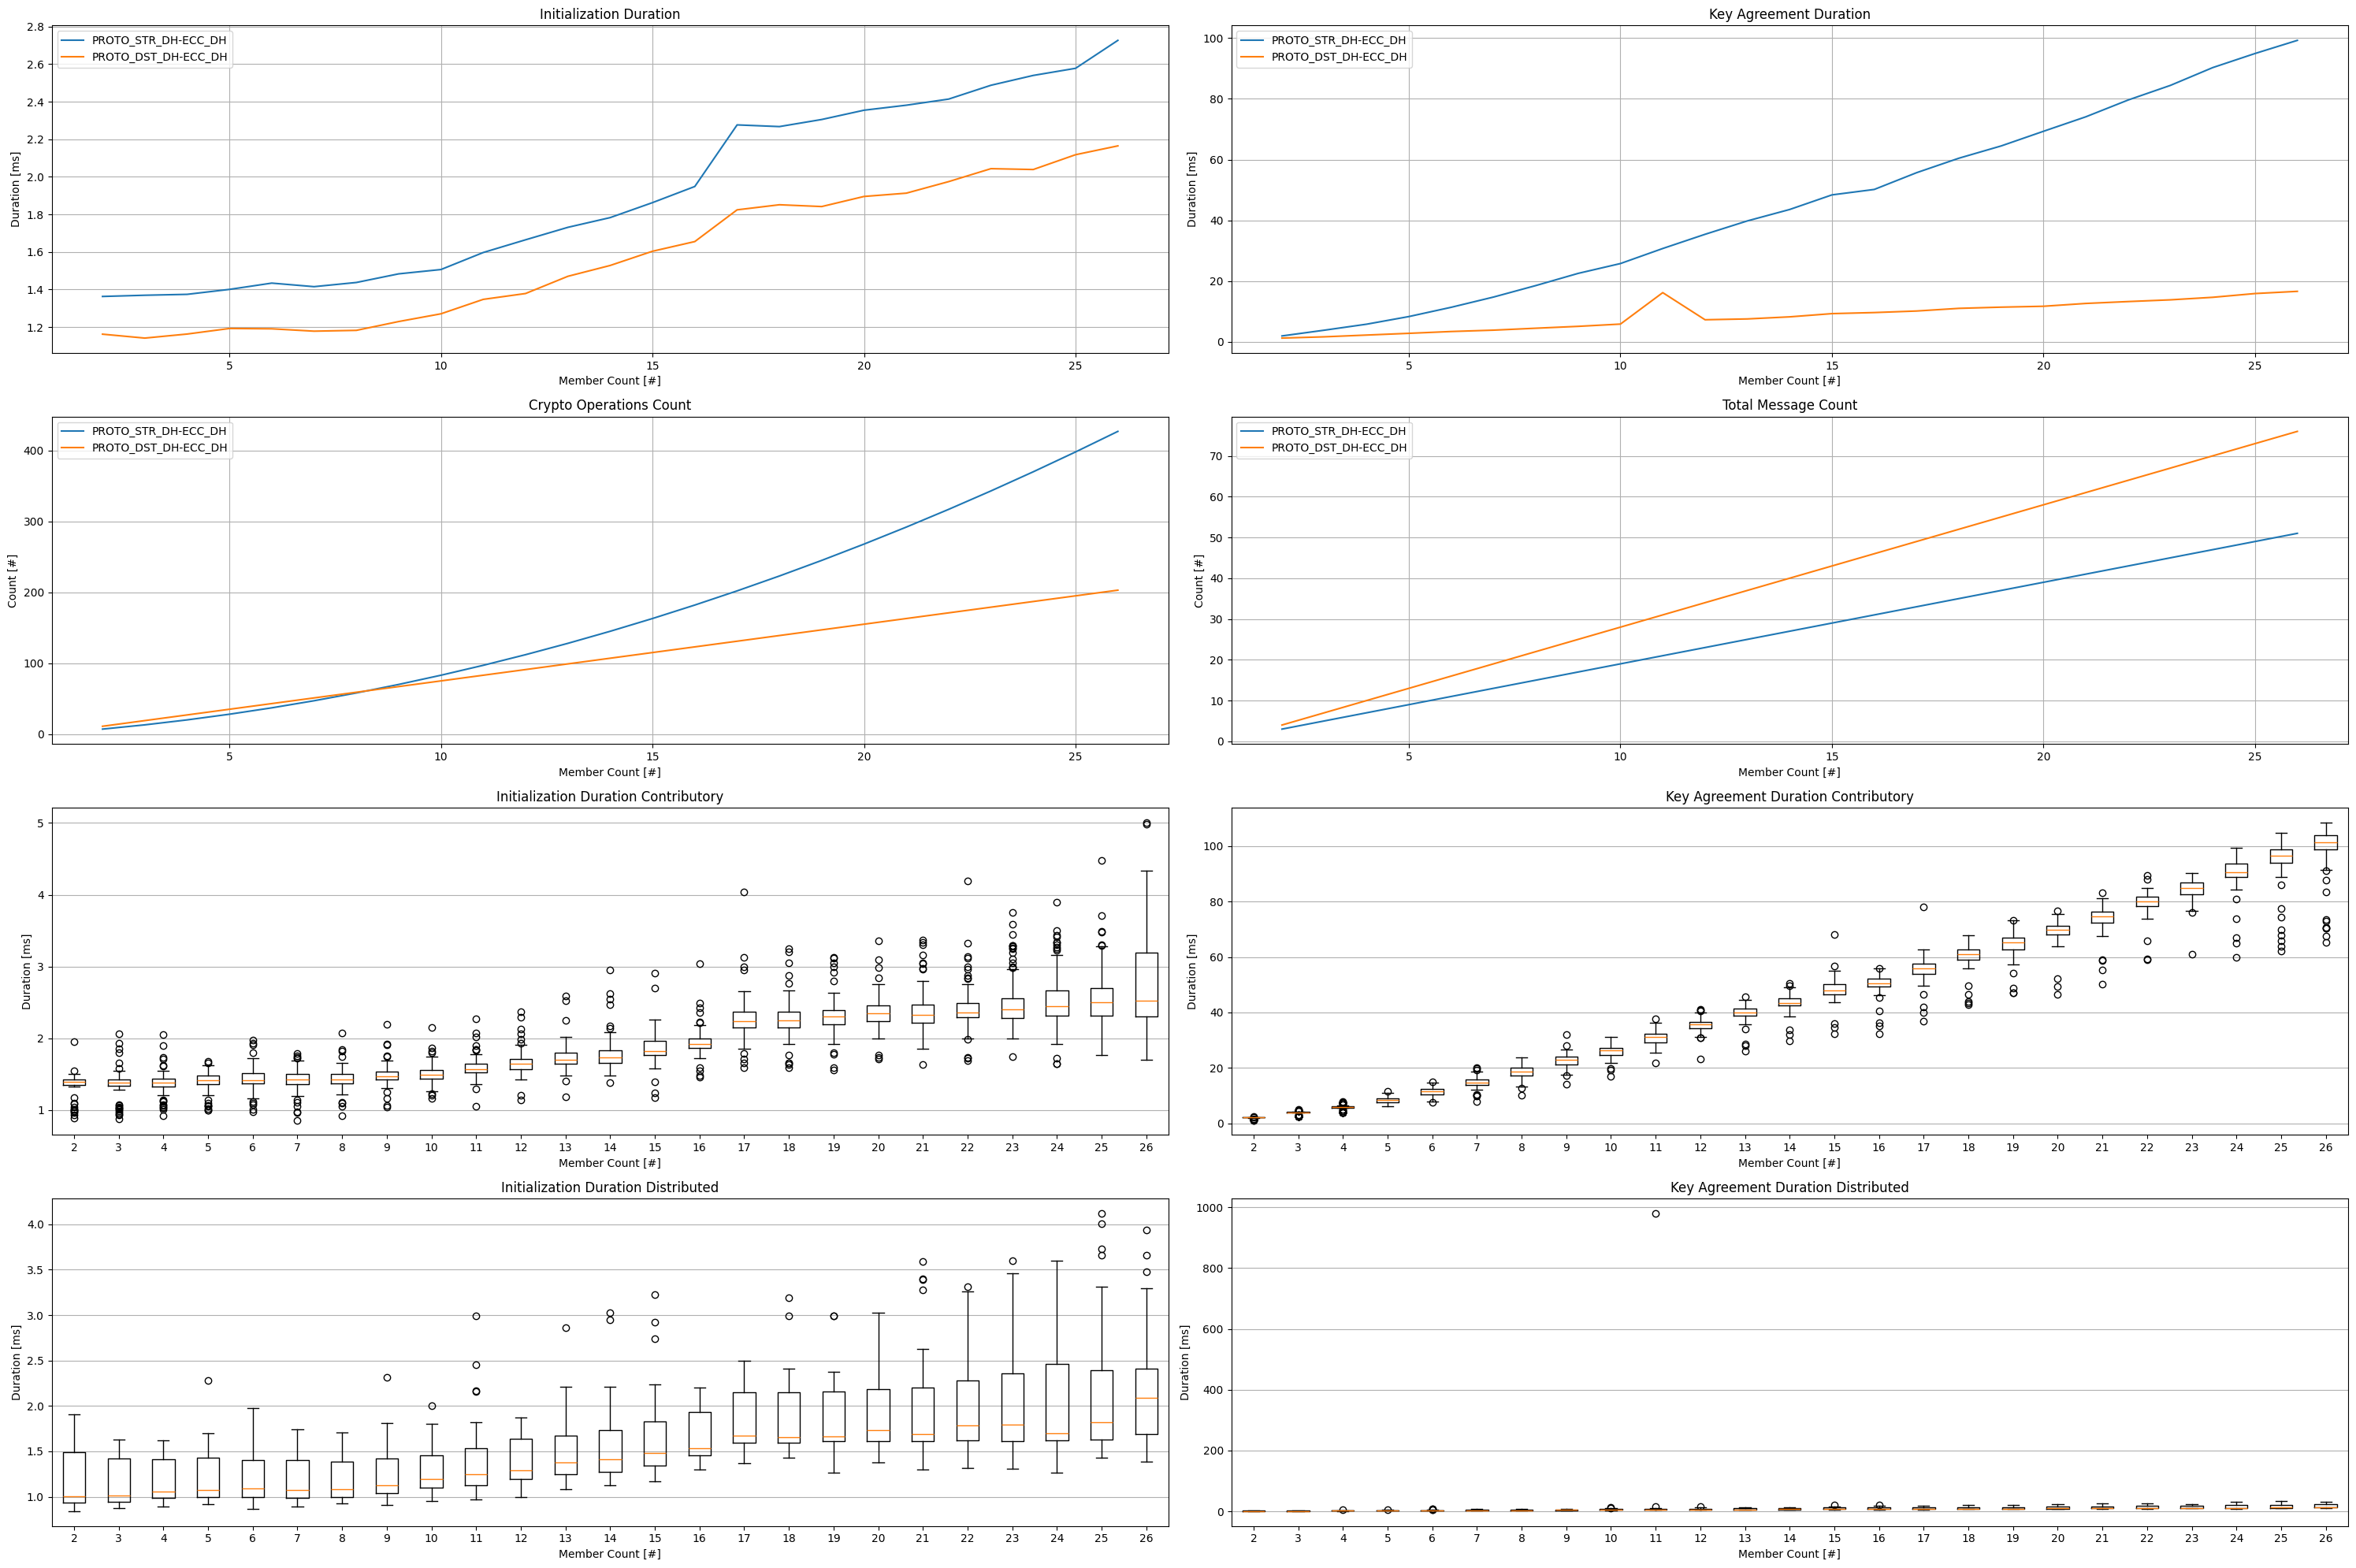

In [3]:
fig, ax = plt.subplots(4, 2, figsize=(30, 20))
ax[0,0].set_title('Initialization Duration')
ax[0,0].set_xlabel('Member Count [#]')
ax[0,0].set_ylabel('Duration [ms]')

ax[0,1].set_title('Key Agreement Duration')
ax[0,1].set_xlabel('Member Count [#]')
ax[0,1].set_ylabel('Duration [ms]')

ax[1,0].set_title('Crypto Operations Count')
ax[1,0].set_xlabel('Member Count [#]')
ax[1,0].set_ylabel('Count [#]')

ax[1,1].set_title('Total Message Count')
ax[1,1].set_xlabel('Member Count [#]')
ax[1,1].set_ylabel('Count [#]')

ax[2,0].set_title('Initialization Duration Contributory')
ax[2,0].set_xlabel('Member Count [#]')
ax[2,0].set_ylabel('Duration [ms]')

ax[2,1].set_title('Key Agreement Duration Contributory')
ax[2,1].set_xlabel('Member Count [#]')
ax[2,1].set_ylabel('Duration [ms]')

ax[3,0].set_title('Initialization Duration Distributed')
ax[3,0].set_xlabel('Member Count [#]')
ax[3,0].set_ylabel('Duration [ms]')

ax[3,1].set_title('Key Agreement Duration Distributed')
ax[3,1].set_xlabel('Member Count [#]')
ax[3,1].set_ylabel('Duration [ms]')


member_count_axis = np.linspace(100,1000,10)
member_range = [i for i in range(100, 1100, 100)]

# member_count_axis = np.linspace(2,26,25)
# member_range = [i for i in range(2, 27)]

MESSAGE_COUNTS = ['FIND_MESSAGE_COUNT',
                  'OFFER_MESSAGE_COUNT',
                  'REQUEST_MESSAGE_COUNT',
                  'RESPONSE_MESSAGE_COUNT',
                  'MEMBER_INFO_REQUEST_MESSAGE_COUNT',
                  'MEMBER_INFO_RESPONSE_MESSAGE_COUNT',
                  'SYNCH_TOKEN_MESSAGE_COUNT',
                  'FINISH_MESSAGE_COUNT',
                  'FINISH_ACK_MESSAGE_COUNT',
                  'DISTRIBUTED_RESPONSE_MESSAGE_COUNT']

KEY_AGREEMENT_PROTOCOL = ['PROTO_STR_DH','PROTO_DST_DH']
# CRYPTO_ALGORITHM = ['DEFAULT_DH','ECC_DH']
CRYPTO_ALGORITHM = ['ECC_DH']

boxplotdict = dict()
for protocol in KEY_AGREEMENT_PROTOCOL:
    for algorithm in CRYPTO_ALGORITHM:
        initialization_duration_list = list()
        key_agreement_duration_list = list()
        crypto_operations_count_list = list()
        total_message_count_list = list()
        boxplotlist = list()
        for member_count in member_range:
            # print("{}-{}-{}".format(protocol,algorithm,member_count))
            dataframes = []
            for file_count in range(0,133):
            # for file_count in range(0,100):
                df_dh = pd.read_csv(filepath_or_buffer="../statistic_results/without_retransmissions_1000_20231028/{}-{}-{}-#{}.csv".format(protocol,algorithm,member_count,file_count), header=0, sep=',', dtype=np.longlong)
                df_dh['FULL_DURATION'] = df_dh['DURATION_END']-df_dh['DURATION_START']
                df_dh['KEY_AGREEMENT_DURATION'] = df_dh['DURATION_END']-df_dh['KEY_AGREEMENT_START']
                df_dh['INITIALIZATION_DURATION'] = df_dh['FULL_DURATION']-df_dh['KEY_AGREEMENT_DURATION']
                df_dh['TOTAL_MESSAGE_COUNT'] = 0
                for message_count in MESSAGE_COUNTS:
                    df_dh['TOTAL_MESSAGE_COUNT'] += df_dh[message_count];
                dataframes.append(df_dh)
            # print("INITIALIZATION DURATION: {:.2f}ms".format(df_dh['INITIALIZATION_DURATION'].mean()/1000_000))
            # print("FULL DURATION: {:.2f}ms".format(df_dh['FULL_DURATION'].mean()/1000_000))
            # print("KEY AGREEMENT DURATION: {:.2f}ms".format(df_dh['KEY_AGREEMENT_DURATION'].mean()/1000_000))
            # print("CRYPTO OPERATIONS COUNT: {}".format(df_dh['CRYPTO_OPERATIONS_COUNT'].mean()))
            # print("TOTAL MESSAGE COUNT: {}".format(df_dh['TOTAL_MESSAGE_COUNT'].mean()))
            df_dh_combined = pd.concat(dataframes, ignore_index=True)
            boxplotlist.append(df_dh_combined)
            initialization_duration_list.append(df_dh_combined['INITIALIZATION_DURATION'].mean()/1000_000)
            key_agreement_duration_list.append(df_dh_combined['KEY_AGREEMENT_DURATION'].mean()/1000_000)
            crypto_operations_count_list.append(df_dh_combined['CRYPTO_OPERATIONS_COUNT'].mean())
            total_message_count_list.append(df_dh_combined['TOTAL_MESSAGE_COUNT'].mean())
        ax[0,0].plot(member_count_axis, initialization_duration_list, label="{}-{}".format(protocol,algorithm))
        ax[0,1].plot(member_count_axis, key_agreement_duration_list, label="{}-{}".format(protocol,algorithm))
        ax[1,0].plot(member_count_axis, crypto_operations_count_list, label="{}-{}".format(protocol,algorithm))
        ax[1,1].plot(member_count_axis, total_message_count_list, label="{}-{}".format(protocol,algorithm))
        key = "{}-{}".format(protocol,algorithm)
        boxplotdict[key] = boxplotlist
    
contributory_key = 'PROTO_STR_DH-ECC_DH'
contributory_initialization_data = [df['INITIALIZATION_DURATION']/1000_000 for df in boxplotdict[contributory_key]]
contributory_keyagreement_data = [df['KEY_AGREEMENT_DURATION']/1000_000 for df in boxplotdict[contributory_key]]
ax[2,0].boxplot(contributory_initialization_data, labels=member_range)
ax[2,1].boxplot(contributory_keyagreement_data, labels=member_range)

distributed_key = 'PROTO_DST_DH-ECC_DH'
distributed_initialization_data = [df['INITIALIZATION_DURATION']/1000_000 for df in boxplotdict[distributed_key]]
distributed_keyagreement_data = [df['KEY_AGREEMENT_DURATION']/1000_000 for df in boxplotdict[distributed_key]]
ax[3,0].boxplot(distributed_initialization_data, labels=member_range)
ax[3,1].boxplot(distributed_keyagreement_data, labels=member_range)

fig.tight_layout()
ax[0,0].legend()
ax[0,0].grid(True)
ax[0,1].legend()
ax[0,1].grid(True)
ax[1,0].legend()
ax[1,0].grid(True)
ax[1,1].legend()
ax[1,1].grid(True)
ax[2,0].yaxis.grid(True)
ax[2,1].yaxis.grid(True)
ax[3,0].yaxis.grid(True)
ax[3,1].yaxis.grid(True)
plt.show()

In [4]:
# export to csv
for df_contributed, df_distributed, member_count in zip(contributory_keyagreement_data, distributed_keyagreement_data, member_range):
    filename="{}-{}.csv".format("CONTRIBUTORY-DH-ECC", member_count)
    df_contributed.to_csv("export/{}".format(filename), index=False)
    filename="{}-{}.csv".format("DISTRIBUTED-DH-ECC", member_count)
    df_distributed.to_csv("export/{}".format(filename), index=False)